In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
japan = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/location/JP.csv")
japan = japan.sort_values(['date'])
columns_to_keep = ['date', 'new_confirmed', 'new_deceased', 'cumulative_persons_fully_vaccinated', 'new_persons_fully_vaccinated', 'population']
japan =japan[columns_to_keep]
japan['date'] = pd.to_datetime(japan['date'])
japan = japan.dropna()

chile = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/location/CL.csv")
chile = chile.sort_values(['date'])
columns_to_keep = ['date', 'new_confirmed', 'new_deceased', 'cumulative_persons_fully_vaccinated', 'new_persons_fully_vaccinated', 'population']
chile =chile[columns_to_keep]
chile['date'] = pd.to_datetime(chile['date'])
chile = chile.dropna()

In [3]:
# Normalisation and rolling-average

japan['vaccination_coverage'] = japan['cumulative_persons_fully_vaccinated'] / japan['population']
chile['vaccination_coverage'] = chile['cumulative_persons_fully_vaccinated'] / chile['population']

japan['deaths_per_100k'] = (japan['new_deceased'].rolling(7).mean() / japan['population']) * 100000
chile['deaths_per_100k'] = (chile['new_deceased'].rolling(7).mean() / chile['population']) * 100000

japan['cases_per_100k'] = (japan['new_confirmed'].rolling(7).mean() / japan['population']) * 100000
chile['cases_per_100k'] = (chile['new_confirmed'].rolling(7).mean() / chile['population']) * 100000


# Relationship between vaccination, death rates and cases

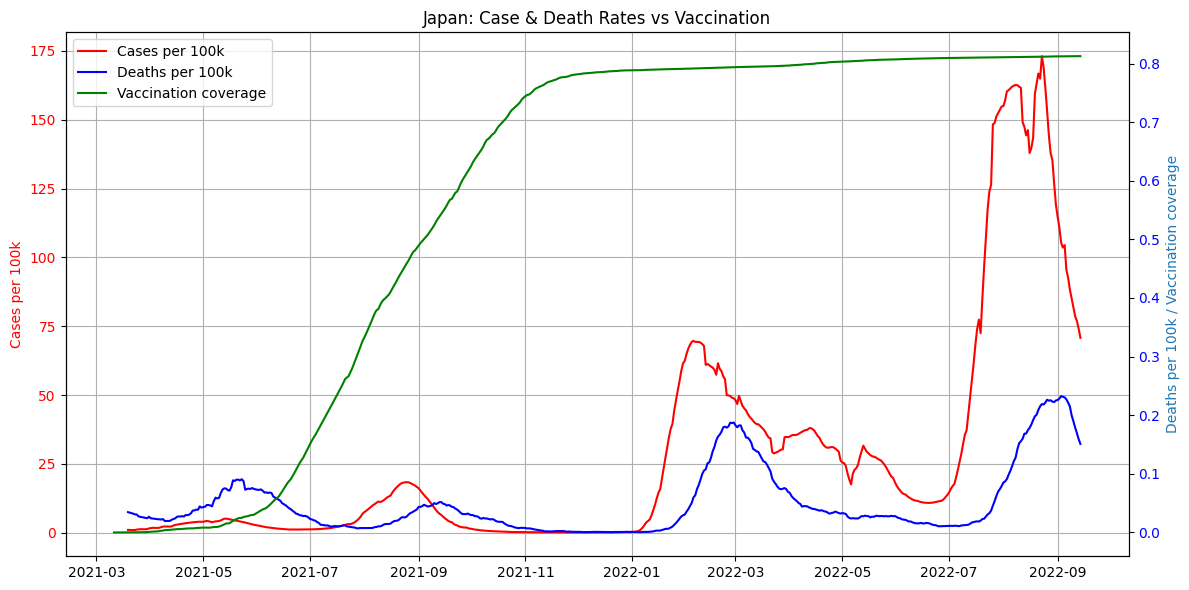

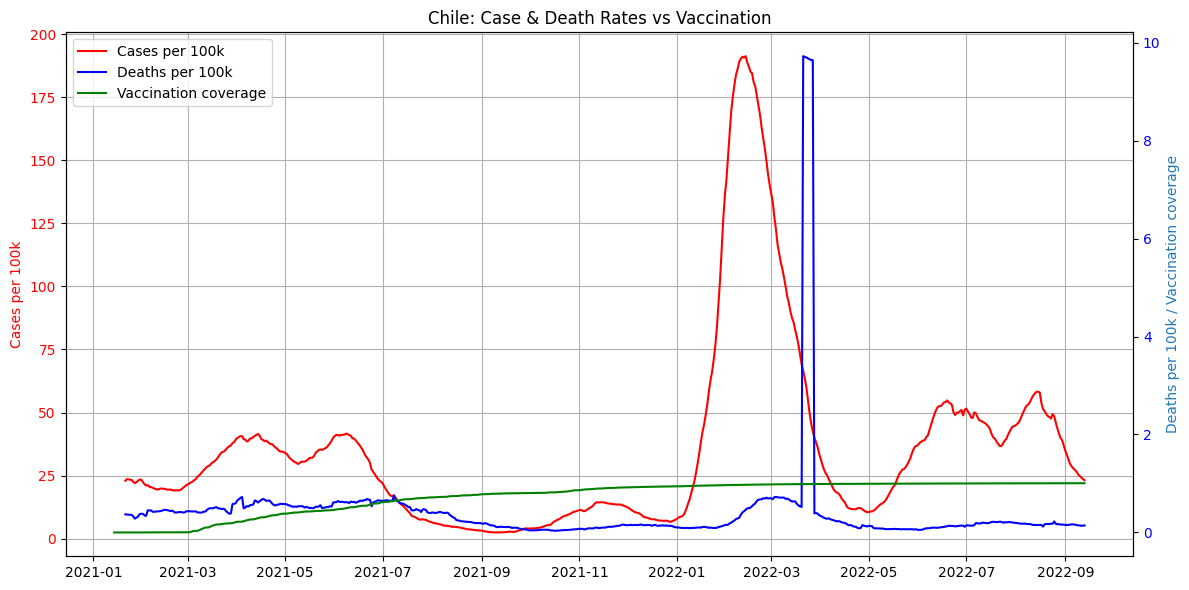

In [8]:
def plot_deaths_cases_vaccine(df, country_name):

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(df['date'], df['cases_per_100k'], color='r', label='Cases per 100k')
    ax1.set_ylabel('Cases per 100k', color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    ax2 = ax1.twinx()
    ax2.plot(df['date'], df['deaths_per_100k'], color='b', label='Deaths per 100k')
    ax2.plot(df['date'], df['vaccination_coverage'], color='g', label='Vaccination coverage')
    ax2.set_ylabel('Deaths per 100k / Vaccination coverage', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='b')

    plt.title(f'{country_name}: Case & Death Rates vs Vaccination')
    fig.tight_layout()
    ax1.grid(True)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

plot_deaths_cases_vaccine(japan, 'Japan')
plot_deaths_cases_vaccine(chile, 'Chile')

# Chile - Lagged correlation

<ipython-input-12-b7c032ea1918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_truncated['cases_per_100k'] = (chile_truncated['new_confirmed'].rolling(7).mean() / chile_truncated['population']) * 100000
<ipython-input-12-b7c032ea1918>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_truncated['vaccination_coverage'] = chile_truncated['cumulative_persons_fully_vaccinated'] / chile_truncated['population']
<ipython-input-12-b7c032ea1918>:9: SettingWithCopyWarning: 
A value is trying to be set on 

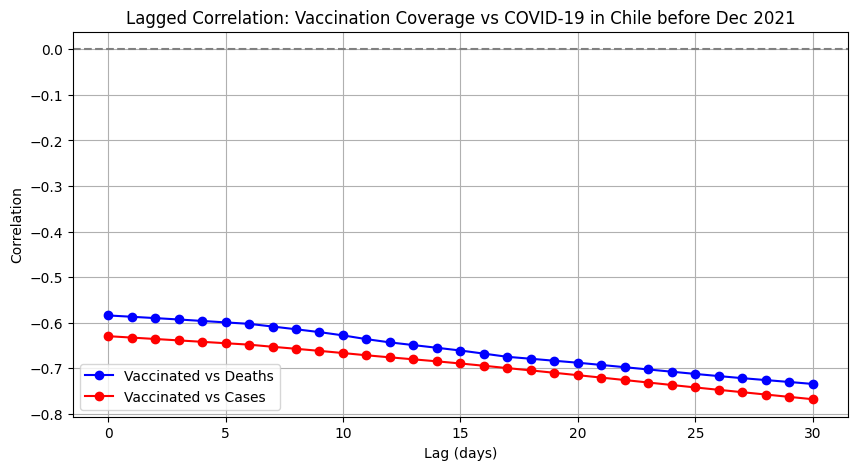

In [12]:
lags = range(0, 31)  # lags from 0 to 30 days

chile_truncated = chile[chile['date'] <= '2021-12-01']
corrs_vax_death = []
corrs_vax_cases = []

chile_truncated['cases_per_100k'] = (chile_truncated['new_confirmed'].rolling(7).mean() / chile_truncated['population']) * 100000
chile_truncated['vaccination_coverage'] = chile_truncated['cumulative_persons_fully_vaccinated'] / chile_truncated['population']
chile_truncated['deaths_per_100k'] = (chile_truncated['new_deceased'].rolling(7).mean() / chile_truncated['population']) * 100000

for lag in lags:
    shifted_vax = chile_truncated['vaccination_coverage'].shift(lag)

    corr_death = chile_truncated['deaths_per_100k'].corr(shifted_vax)
    corr_case = chile_truncated['cases_per_100k'].corr(shifted_vax)

    corrs_vax_death.append(corr_death)
    corrs_vax_cases.append(corr_case)

plt.figure(figsize=(10, 5))
plt.plot(lags, corrs_vax_death, label='Vaccinated vs Deaths', color='b', marker = 'o')
plt.plot(lags, corrs_vax_cases, label='Vaccinated vs Cases', color='r', marker = 'o')
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.title('Lagged Correlation: Vaccination Coverage vs COVID-19 in Chile before Dec 2021')
plt.legend()
plt.grid(True)
plt.show()

# Japan - Lagged correlation

<ipython-input-11-b0db75ce5a59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_truncated['cases_per_100k'] = (japan_truncated['new_confirmed'].rolling(7).mean() / japan_truncated['population']) * 100000
<ipython-input-11-b0db75ce5a59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_truncated['vaccination_coverage'] = japan_truncated['cumulative_persons_fully_vaccinated'] / japan_truncated['population']
<ipython-input-11-b0db75ce5a59>:9: SettingWithCopyWarning: 
A value is trying to be set on 

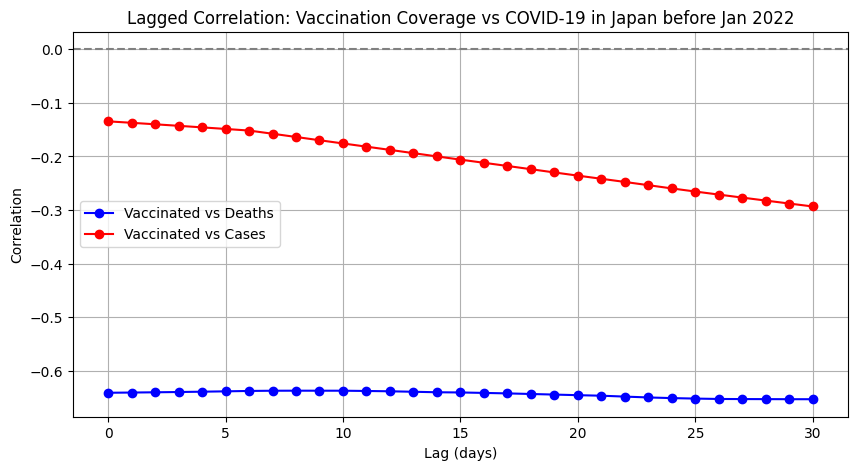

In [11]:
lags = range(0, 31)

japan_truncated = japan[japan['date'] <= '2022-01-01']
corrs_vax_death = []
corrs_vax_cases = []

japan_truncated['cases_per_100k'] = (japan_truncated['new_confirmed'].rolling(7).mean() / japan_truncated['population']) * 100000
japan_truncated['vaccination_coverage'] = japan_truncated['cumulative_persons_fully_vaccinated'] / japan_truncated['population']
japan_truncated['deaths_per_100k'] = (japan_truncated['new_deceased'].rolling(7).mean() / japan_truncated['population']) * 100000

for lag in lags:
    shifted_vax = japan_truncated['vaccination_coverage'].shift(lag)

    corr_death = japan_truncated['deaths_per_100k'].corr(shifted_vax)
    corr_case = japan_truncated['cases_per_100k'].corr(shifted_vax)

    corrs_vax_death.append(corr_death)
    corrs_vax_cases.append(corr_case)

plt.figure(figsize=(10, 5))
plt.plot(lags, corrs_vax_death, label='Vaccinated vs Deaths', color='b', marker = 'o')
plt.plot(lags, corrs_vax_cases, label='Vaccinated vs Cases', color='r', marker = 'o')
plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.title('Lagged Correlation: Vaccination Coverage vs COVID-19 in Japan before Jan 2022')
plt.legend()
plt.grid(True)
plt.show()

# Correlation coefficient

In [14]:
corr_death_j = japan_truncated['vaccination_coverage'].corr(japan_truncated['deaths_per_100k'])
corr_cases_j = japan_truncated['vaccination_coverage'].corr(japan_truncated['cases_per_100k'])
corr_death_c = chile_truncated['vaccination_coverage'].corr(chile_truncated['deaths_per_100k'])
corr_cases_c = chile_truncated['vaccination_coverage'].corr(chile_truncated['cases_per_100k'])

print('Correlation coefficient for Japan:')
print('Vaccinated vs Deaths:', corr_death_j)
print('Vaccinated vs Cases:', corr_cases_j)

print('Correlation coefficient for Chile:')
print('Vaccinated vs Deaths:', corr_death_c)
print('Vaccinated vs Cases:', corr_cases_c)

Correlation coefficient for Japan:
Vaccinated vs Deaths: -0.6407585930699395
Vaccinated vs Cases: -0.13451800136095626
Correlation coefficient for Chile:
Vaccinated vs Deaths: -0.5839745479815703
Vaccinated vs Cases: -0.6294460110217427


# Chile: Mean cases and deaths before and after 50% vaccinated

In [15]:
threshold = 0.50

before = chile_truncated[chile_truncated['vaccination_coverage'] < threshold]
after = chile_truncated[chile_truncated['vaccination_coverage'] >= threshold]

mean_cases_before = before['cases_per_100k'].mean()
mean_cases_after = after['cases_per_100k'].mean()

mean_deaths_before = before['deaths_per_100k'].mean()
mean_deaths_after = after['deaths_per_100k'].mean()

print("Cases per 100k — before:", mean_cases_before)
print("Cases per 100k — after:", mean_cases_after)
print("Deaths per 100k — before:", mean_deaths_before)
print("Deaths per 100k — after:", mean_deaths_after)

Cases per 100k — before: 30.796557990857764
Cases per 100k — after: 11.101034316974363
Deaths per 100k — before: 0.5047263861972758
Deaths per 100k — after: 0.2748534852319061


# Japan: Mean cases and deaths before and after 50% vaccinated

In [16]:
threshold = 0.50

before = japan_truncated[japan_truncated['vaccination_coverage'] < threshold]
after = japan_truncated[japan_truncated['vaccination_coverage'] >= threshold]

mean_cases_before = before['cases_per_100k'].mean()
mean_cases_after = after['cases_per_100k'].mean()

mean_deaths_before = before['deaths_per_100k'].mean()
mean_deaths_after = after['deaths_per_100k'].mean()

print("Cases per 100k — before:", mean_cases_before)
print("Cases per 100k — after:", mean_cases_after)
print("Deaths per 100k — before:", mean_deaths_before)
print("Deaths per 100k — after:", mean_deaths_after)


Cases per 100k — before: 5.049574227040641
Cases per 100k — after: 1.5346588397163548
Deaths per 100k — before: 0.03564779558445004
Deaths per 100k — after: 0.015339764239911331
